In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD2.csv")
print("Initial dataset:")
print(df.head())

Initial dataset:
   Year  Month     Region Home Size  Purchase Completion  Average Sales Price  \
0  2022     12    Midwest    Double                    0               144300   
1  2022     12    Midwest   Single                     0                82300   
2  2022     12    Midwest    Total1                    0               104700   
3  2022     12  Northeast    Double                    0               158300   
4  2022     12  Northeast   Single                     0                75300   

   Number of Households (Thousands)  Median Income - Current Dollars  \
0                             28280                            73070   
1                             28280                            73070   
2                             28280                            73070   
3                             22630                            80360   
4                             22630                            80360   

   Median Income - 2022 Dollars  Mean Income - Current Dollars 

In [2]:
# Handling missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Numerical missing values
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[np.number]))

# Categorical missing values
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=["object"]).columns] = cat_imputer.fit_transform(df.select_dtypes(include=["object"]))

print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values before handling:
Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

Missing values after handling:
Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64



Data after standardization:
       Year     Month     Region Home Size  Purchase Completion  \
0  1.294595  1.547358    Midwest    Double            -0.907148   
1  1.294595  1.547358    Midwest   Single             -0.907148   
2  1.294595  1.547358    Midwest    Total1            -0.907148   
3  1.294595  1.547358  Northeast    Double            -0.907148   
4  1.294595  1.547358  Northeast   Single             -0.907148   

   Average Sales Price  Number of Households (Thousands)  \
0             1.484648                         -0.589688   
1            -0.520278                         -0.589688   
2             0.204082                         -0.589688   
3             1.937373                         -0.730762   
4            -0.746641                         -0.730762   

   Median Income - Current Dollars  Median Income - 2022 Dollars  \
0                         0.208632                     -0.795504   
1                         0.208632                     -0.795504   
2  

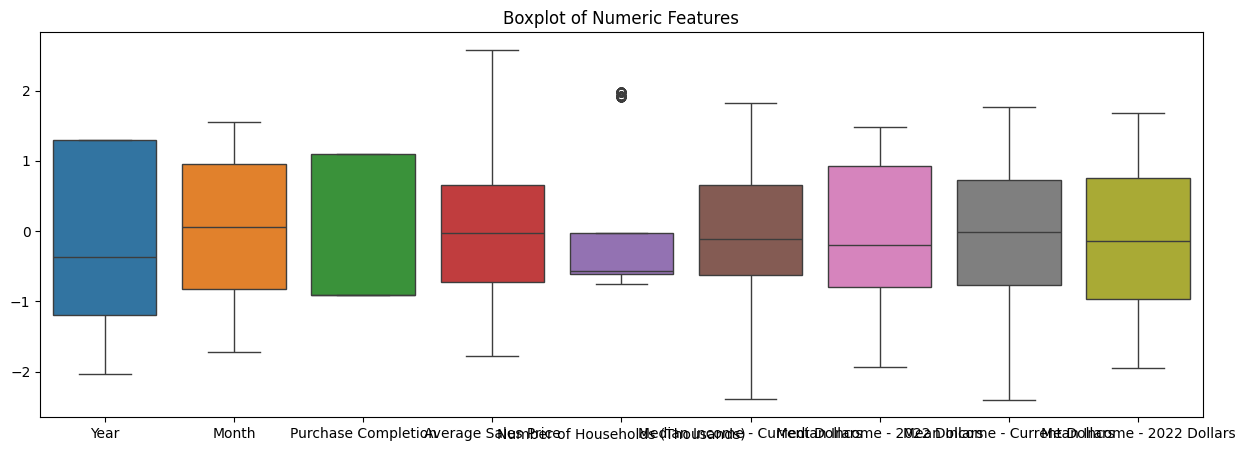


Plotting histograms for numerical columns...


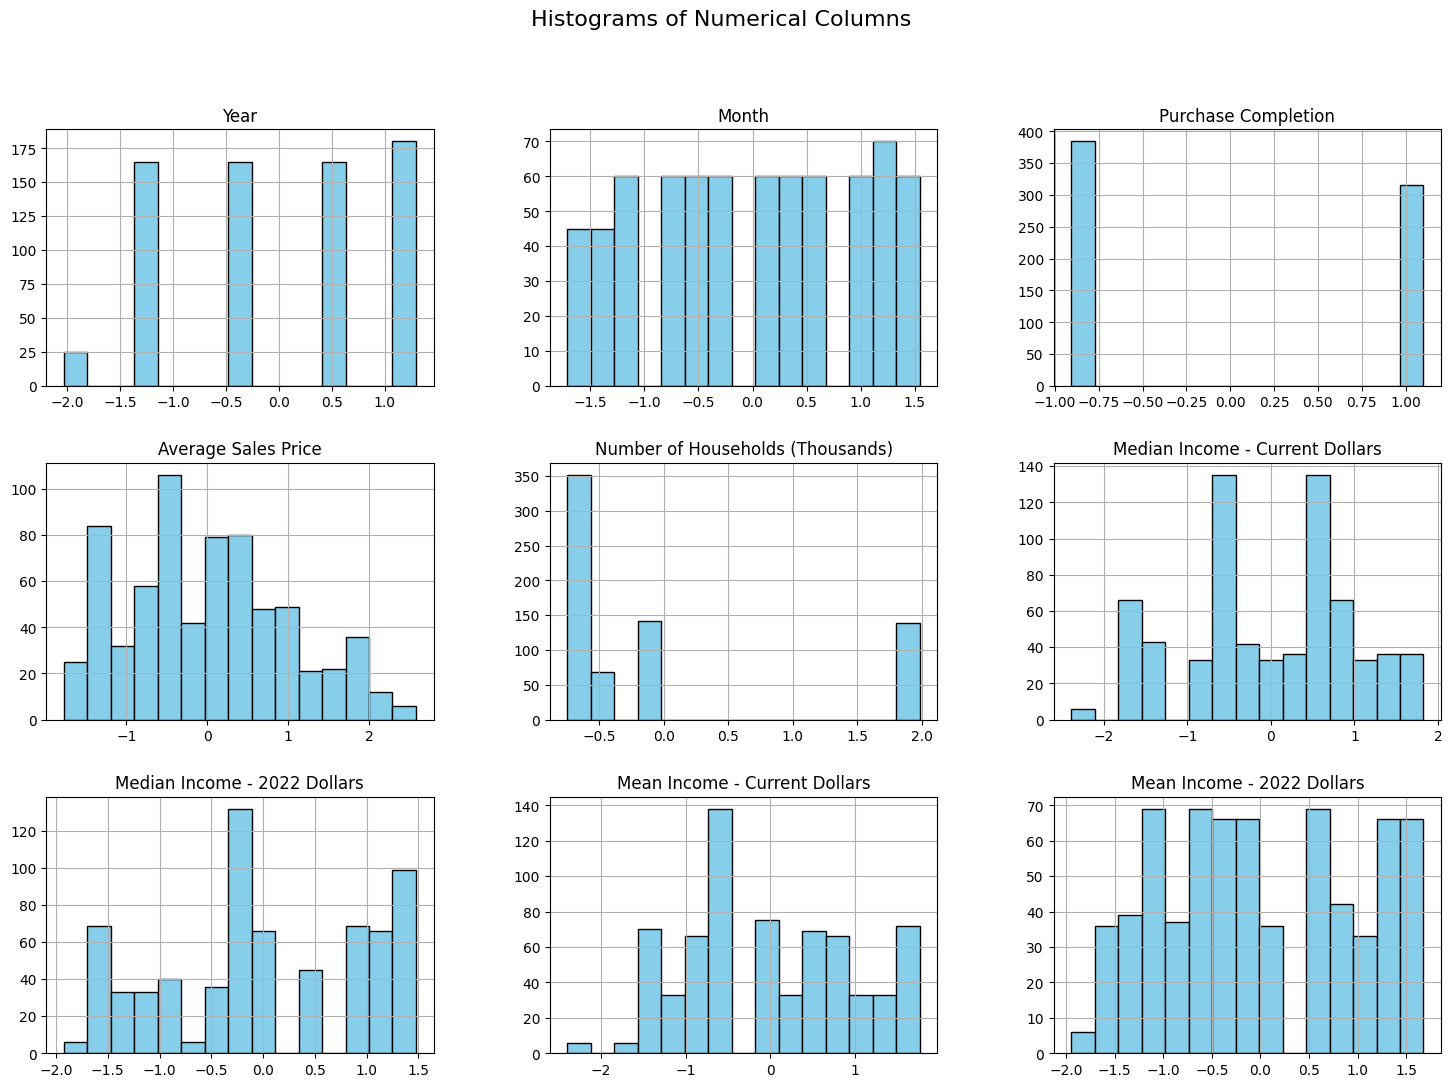


Plotting bar graph for categorical column (Home Size)...


/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_20677/4135422665.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='pastel')


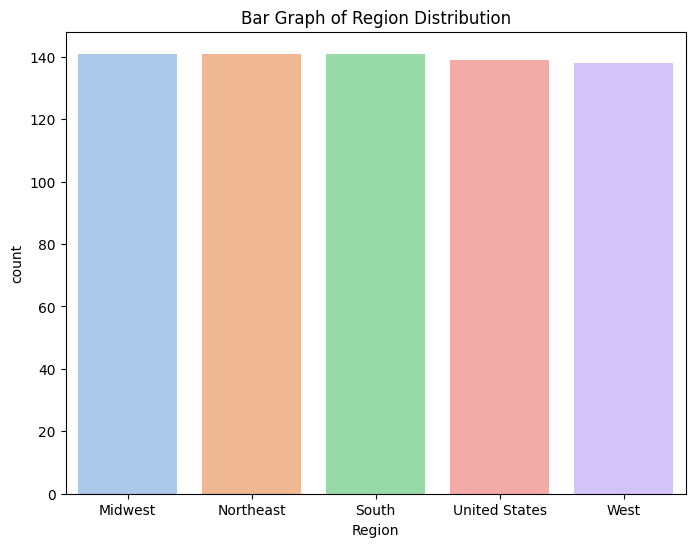

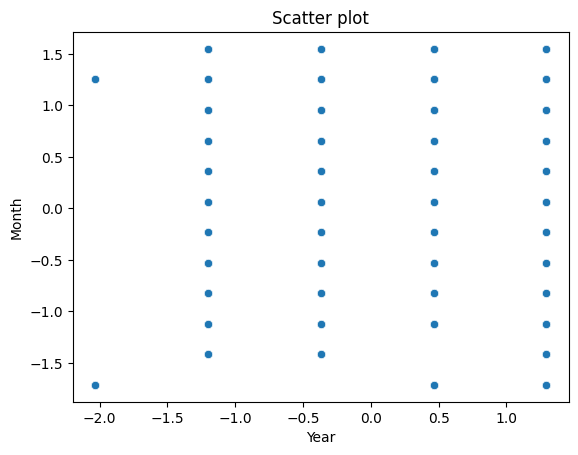

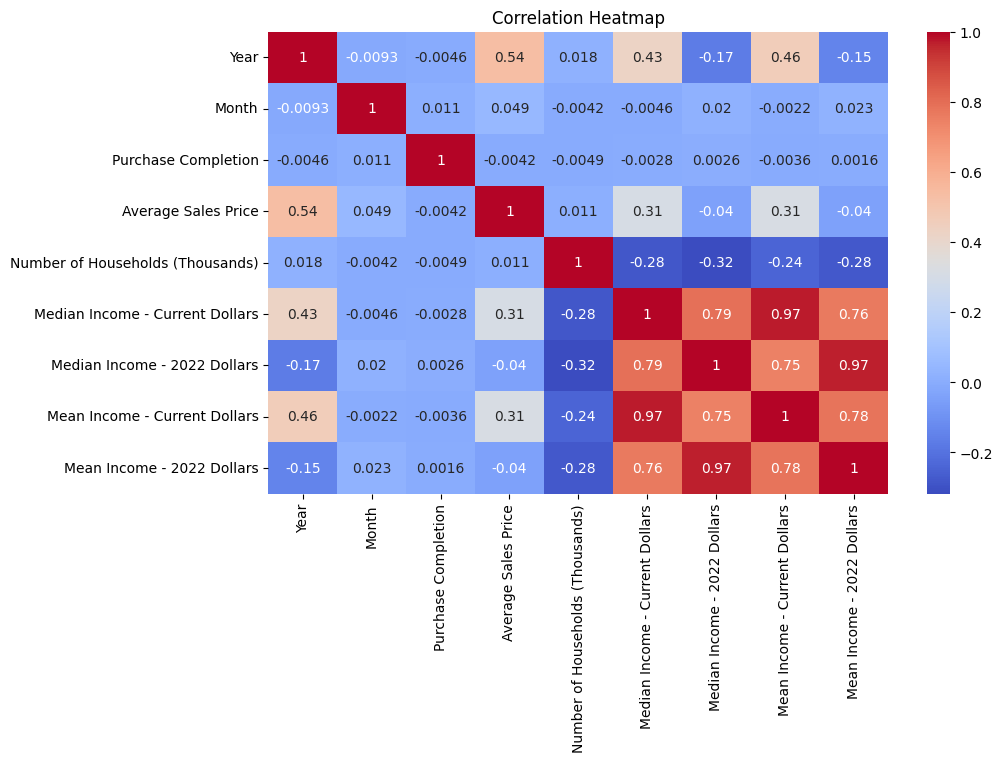

In [3]:
# Standardization
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nData after standardization:")
print(df.head())

# Univariate Analysis
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Numeric Features")
plt.show()

print("\nPlotting histograms for numerical columns...")
df.hist(figsize=(18, 12), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

# Bar graph for categorical column (Gender distribution)
print("\nPlotting bar graph for categorical column (Home Size)...")
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=df, palette='pastel')
plt.title("Bar Graph of Region Distribution")
plt.show()

sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.title("Scatter plot")
plt.show()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

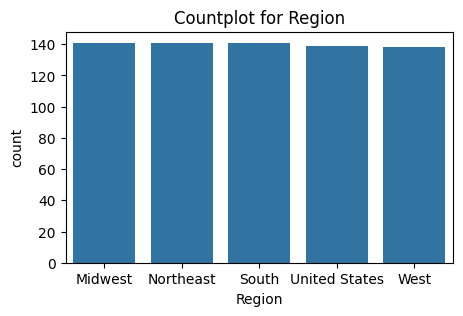

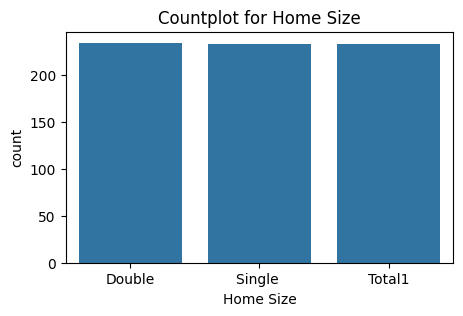

      Region  Region_Encoded
0    Midwest               0
1    Midwest               0
2    Midwest               0
3  Northeast               1
4  Northeast               1
  Home Size  Size_Double  Size_Single   Size_Total1
0    Double         True         False        False
1   Single         False          True        False
2    Total1        False         False         True
3    Double         True         False        False
4   Single         False          True        False


In [4]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f"Countplot for {col}")
    plt.show()

#label encoding
label_encoder = LabelEncoder()
df['Region_Encoded'] = label_encoder.fit_transform(df['Region'])
print(df[['Region', 'Region_Encoded']].head())

#onehot encoding
one_hot_encoded = pd.get_dummies(df['Home Size'], prefix='Size')
df = pd.concat([df, one_hot_encoded], axis=1)
print(df[['Home Size'] + list(one_hot_encoded.columns)].head())


Data after encoding categorical features:
       Year     Month  Region  Home Size  Purchase Completion  \
0  1.294595  1.547358       0          0            -0.907148   
1  1.294595  1.547358       0          1            -0.907148   
2  1.294595  1.547358       0          2            -0.907148   
3  1.294595  1.547358       1          0            -0.907148   
4  1.294595  1.547358       1          1            -0.907148   

   Average Sales Price  Number of Households (Thousands)  \
0             1.484648                         -0.589688   
1            -0.520278                         -0.589688   
2             0.204082                         -0.589688   
3             1.937373                         -0.730762   
4            -0.746641                         -0.730762   

   Median Income - Current Dollars  Median Income - 2022 Dollars  \
0                         0.208632                     -0.795504   
1                         0.208632                     -0.795504   
2

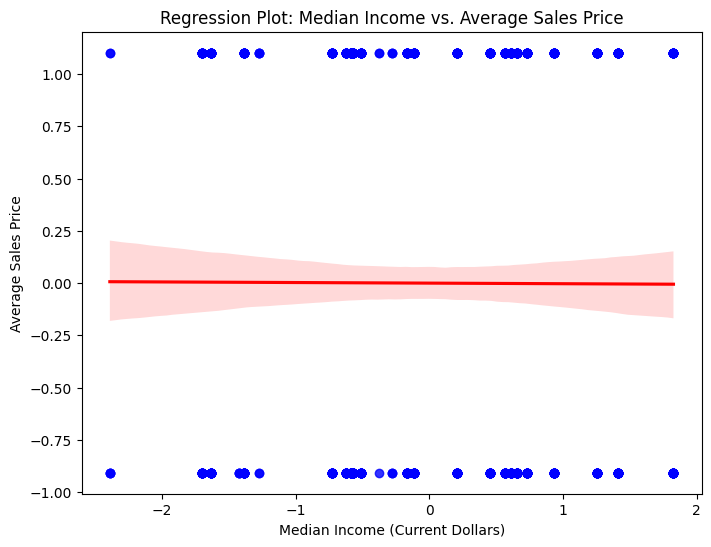

In [9]:
# Encode categorical variables using LabelEncoder
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

print("\nData after encoding categorical features:")
print(df.head())


# Check if encoding worked
print("\nData after encoding categorical features:")
print(df.head())


# Splitting Data
X = df.drop(columns=['Purchase Completion'])  # Assuming 'target' is the target column
y = df['Purchase Completion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
sns.regplot(x=X['Median Income - Current Dollars'], y=y, color='blue', line_kws={'color': 'red'})
plt.xlabel("Median Income (Current Dollars)")
plt.ylabel("Average Sales Price")
plt.title("Regression Plot: Median Income vs. Average Sales Price")
plt.show()


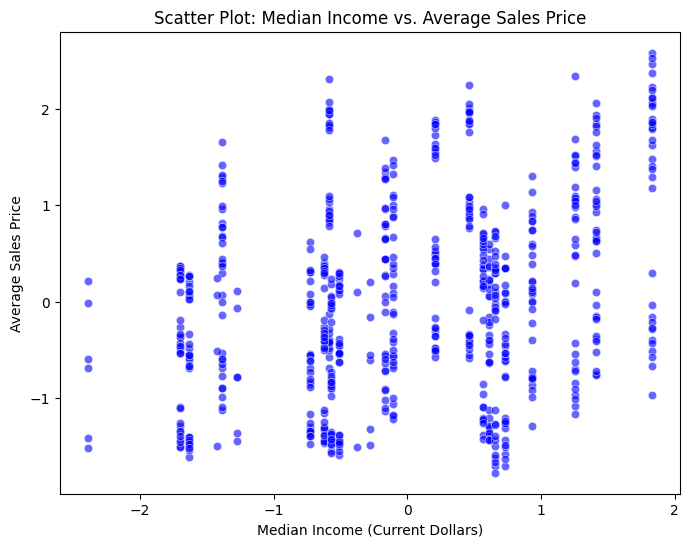

In [12]:
# Identify dependent and independent variables

# Selecting the independent and dependent variables
X = df[['Median Income - Current Dollars']]  # Independent variable
y = df['Average Sales Price']   # Dependent variable

# Visualizing the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Median Income - Current Dollars'], y=y, color='blue', alpha=0.6)
plt.xlabel("Median Income (Current Dollars)")
plt.ylabel("Average Sales Price")
plt.title("Scatter Plot: Median Income vs. Average Sales Price")
plt.show()


Shape of Training Set: (560, 1) (560,)
Shape of Testing Set: (140, 1) (140,)


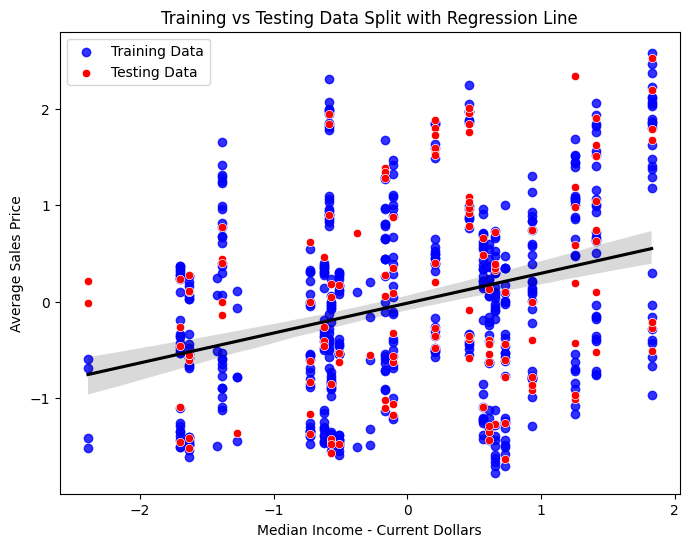


Intercept (c): -0.016329154160661965
Slope (m): 0.309820116159624


In [13]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of Training Set:", X_train.shape, y_train.shape)
print("Shape of Testing Set:", X_test.shape, y_test.shape)

# Plot training and testing data
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train['Median Income - Current Dollars'], y=y_train, color='blue', label="Training Data", line_kws={'color': 'black'})
sns.scatterplot(x=X_test['Median Income - Current Dollars'], y=y_test, color='red', label="Testing Data")
plt.xlabel("Median Income - Current Dollars")
plt.ylabel("Average Sales Price")
plt.title("Training vs Testing Data Split with Regression Line")
plt.legend()
plt.show()

# Train the Simple Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Retrieve Model Coefficients
print("\nIntercept (c):", lr.intercept_)
print("Slope (m):", lr.coef_[0])

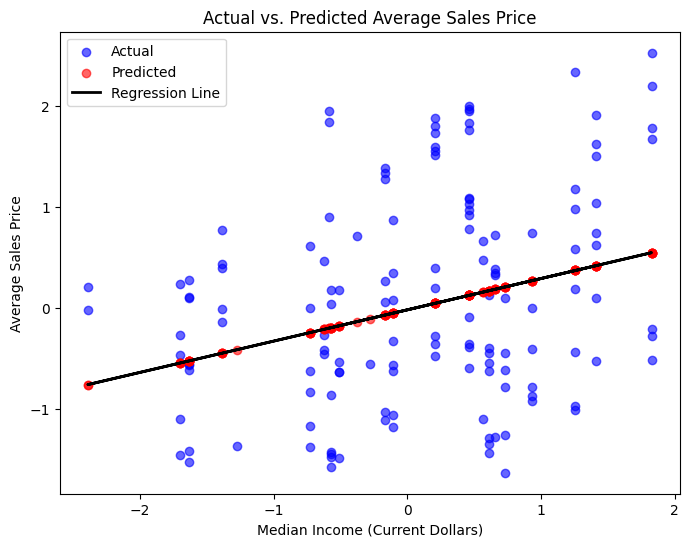


Model Evaluation Metrics:
R Score: 0.07836363377144573
Mean Squared Error: 0.9894815169480484


In [14]:
# Making Predictions
y_pred = lr.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label="Predicted", alpha=0.6)
plt.plot(X_test, y_pred, color="black", linewidth=2, label="Regression Line")  # Regression Line
plt.xlabel("Median Income (Current Dollars)")
plt.ylabel("Average Sales Price")
plt.title("Actual vs. Predicted Average Sales Price")
plt.legend()
plt.show()

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("R Score:", r2)
print("Mean Squared Error:", mse)